In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import matplotlib.pyplot as plt

In [3]:
# Load model and tokenizer
model_name = "/content/drive/MyDrive/Colab Notebooks/bert-toxic-model-version1"  # Pretrained model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [8]:
# Input text
text = """i will bash your head"""

In [9]:
# Tokenize input
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Convert logits to probabilities
logits = outputs.logits
probs = torch.nn.functional.softmax(logits, dim=-1)

# Get the predicted label
predicted_class_idx = torch.argmax(probs, dim=-1).item()

# Define the labels
labels = ["Non-Toxic", "Toxic"]

# Print result as "Toxic" or "Non-Toxic"
prediction = labels[predicted_class_idx]

In [10]:
print(f"Prediction: {prediction}")

Prediction: Toxic


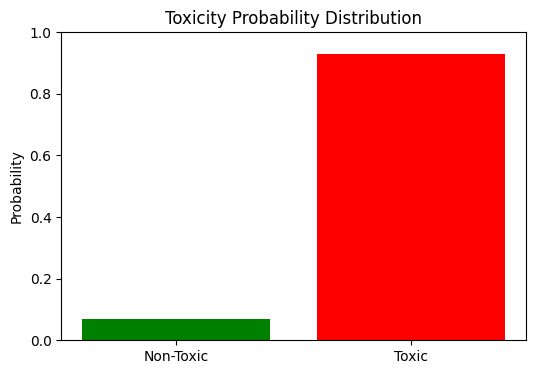

In [11]:
plt.figure(figsize=(6, 4))
plt.bar(labels, probs[0].detach().numpy(), color=['green', 'red'])
plt.title("Toxicity Probability Distribution")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.show()